# EXPLORING DATA

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import regex as re

In [2]:
# Reading CSV
df = pd.read_csv ('./data/attacks.csv', encoding='unicode_escape')

In [3]:
# Estructure of the data
print(df.shape)
print(df.columns)

(25723, 24)
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [4]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


# CLEANING DATA

In [5]:
# Removing unnecessary columns for the analysis
df.drop(columns=['Case Number', 'Date', 'Area', 'Location', 'Name', 'Injury', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22','Unnamed: 23'], inplace=True)
df

,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species
0,2018.0,Boating,USA,Paddling,F,57,N,White shark
1,2018.0,Unprovoked,USA,Standing,F,11,N,NaN
2,2018.0,Invalid,USA,Surfing,M,48,N,NaN
3,2018.0,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,2 m shark
4,2018.0,Provoked,MEXICO,Free diving,M,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Removing Nan and duplicate values
df.dropna(thresh=1, inplace=True)
df

,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species
0,2018.0,Boating,USA,Paddling,F,57,N,White shark
1,2018.0,Unprovoked,USA,Standing,F,11,N,NaN
2,2018.0,Invalid,USA,Surfing,M,48,N,NaN
3,2018.0,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,2 m shark
4,2018.0,Provoked,MEXICO,Free diving,M,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...
6297,0.0,Unprovoked,AUSTRALIA,Diving,M,NaN,Y,NaN
6298,0.0,Unprovoked,AUSTRALIA,Pearl diving,M,NaN,Y,NaN
6299,0.0,Unprovoked,USA,Swimming,M,NaN,Y,NaN
6300,0.0,Unprovoked,PANAMA,NaN,M,NaN,Y,NaN


In [7]:
df.drop_duplicates(inplace=True)
print(df.shape)


(6183, 8)


In [8]:
df.isna().sum()

Year              2
Type              4
Country          49
Activity        530
Sex             559
Age            2737
Fatal (Y/N)     538
Species        2737
dtype: int64

In [9]:
list(df.columns)

['Year',
 'Type',
 'Country',
 'Activity',
 'Sex ',
 'Age',
 'Fatal (Y/N)',
 'Species ']

In [10]:
df.rename(columns = {'Sex ':'Sex', 'Species ':'Species'}, inplace = True)
list(df.columns)

['Year', 'Type', 'Country', 'Activity', 'Sex', 'Age', 'Fatal (Y/N)', 'Species']

## FIXING COLUMN VALUES

YEAR

In [11]:
df[df['Year'].isna()]

,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species
187,NaN,Invalid,AUSTRALIA,Spearfishing,M,35,NaN,Bull shark
6079,NaN,Unprovoked,ENGLAND,Swimming,M,NaN,Y,NaN


In [12]:
df['Year'].fillna(0,inplace=True)

In [13]:
df['Year'].agg(['min', 'max'])

min       0.0
max    2018.0
Name: Year, dtype: float64

<AxesSubplot:ylabel='Frequency'>

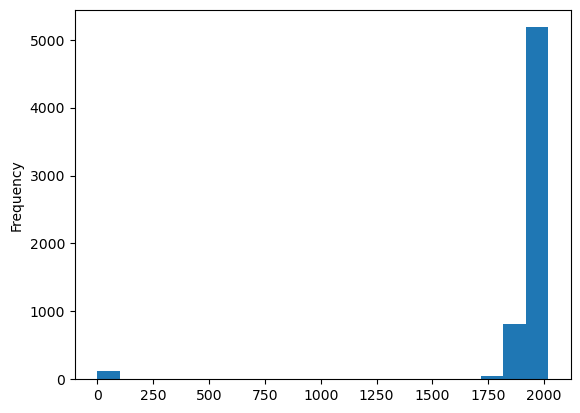

In [14]:
df['Year'] = df['Year'].apply(int)
df['Year'].plot.hist(bins = 20)

In [15]:
df["Decade"] = pd.cut(df['Year'], bins=[0, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]) # Maybe include labels
df["Decade"].head()

0    (2010, 2020]
1    (2010, 2020]
2    (2010, 2020]
3    (2010, 2020]
4    (2010, 2020]
Name: Decade, dtype: category
Categories (13, interval[int64, right]): [(0, 1900] < (1900, 1910] < (1910, 1920] < (1920, 1930] ... (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

<AxesSubplot:title={'center':'Number of attacks per decade'}, xlabel='Decade'>

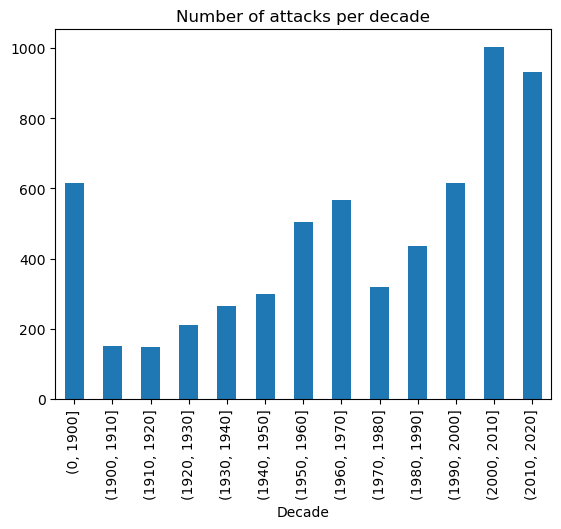

In [16]:
df.groupby('Decade')['Decade'].agg(len).plot.bar(title = 'Number of attacks per decade')

TYPE

In [17]:
df['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [18]:
df['Type'].fillna('Invalid',inplace=True)
df['Type'].replace('Boating','Boat', inplace=True)
df['Type'].replace('Boatomg','Boat', inplace=True)
df['Type'].unique()

array(['Boat', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster'], dtype=object)

<AxesSubplot:title={'center':'Type of attack'}, ylabel='Type'>

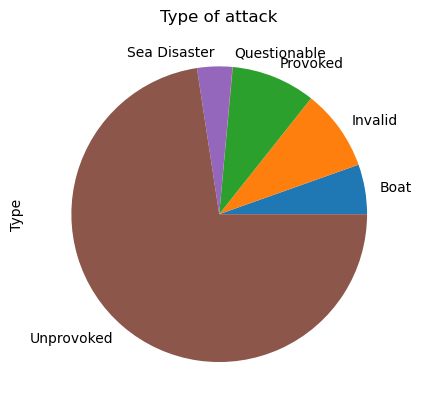

In [19]:
df.groupby('Type')['Type'].agg(len).plot.pie(title = 'Type of attack')

COUNTRY

In [20]:
df["Country"] = df["Country"].str.lower().str.strip()
df["Country"].fillna("Unknown", inplace=True)

In [21]:
df['Country'].value_counts().head(10)

usa                 2182
australia           1304
south africa         575
papua new guinea     129
new zealand          127
bahamas              109
brazil               106
mexico                89
italy                 71
fiji                  65
Name: Country, dtype: int64

ACTIVITY

In [22]:
df['Activity'] = df['Activity'].str.lower() 

In [23]:
lst = [['surf','surfing'], ['board','surfing'], ['swim','swimming'], ['bath','swimming'], ['div','swimming'], ['snork','swimming'], 
        ['fish','fishing'], ['wad','wading'], ['stand', 'wading'], ['walk', 'wading']]

for match, new in lst:
    df['Activity'] = df['Activity'].str.replace('(^.*'+match+'.*$)', new, regex = True)

In [24]:
list = ['swimming','surfing','fishing','wading']
for i in df['Activity']:
    if i not in list:
        df['Activity'].replace(i,'other', inplace= True)

In [25]:
df['Activity'].value_counts().head(10)

swimming    1903
surfing     1512
other       1366
fishing     1096
wading       306
Name: Activity, dtype: int64

SEX

In [26]:
df['Sex'] = df['Sex'].str.upper().str.strip()
df['Sex'] = df['Sex'].apply(lambda x: x if x in ('M','F') else '-')
df['Sex'].value_counts().head()

M    4991
F     629
-     563
Name: Sex, dtype: int64

AGE

In [27]:
df['Age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [28]:
df['Age'] = df['Age'].str.extract('(\d+)') # ESTA AGAFANT NOMES EL PRIMER VALOR QUE TROBA
df['Age'] = df['Age'].fillna('Unknown')
df['Age'].unique()

array(['57', '11', '48', 'Unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '13', '42', '3', '8',
       '50', '16', '82', '73', '68', '51', '39', '58', '47', '61', '65',
       '36', '66', '43', '9', '72', '59', '6', '27', '64', '23', '71',
       '44', '62', '63', '70', '53', '77', '74', '5', '86', '84', '75',
       '87', '67', '1', '2', '81', '78'], dtype=object)

FATAL (Y/N)

In [29]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.upper().str.strip()
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].apply(lambda x: x if x in ('Y','N') else '-')
df['Fatal (Y/N)'].value_counts().head()

N    4210
Y    1365
-     608
Name: Fatal (Y/N), dtype: int64

SPECIES

In [30]:
df['Species'] = df['Species'].str.lower()

In [31]:
lst = [['white','white shark'], ['tiger','tiger shark'], ['bull','bull shark'], ['wobbegong', 'wobbegong shark']]

for match, new in lst:
    df['Species'] = df['Species'].str.replace('(^.*'+match+'.*$)', new, regex = True)

In [32]:
df['Species'].value_counts().head(10)

white shark                                           662
tiger shark                                           282
bull shark                                            177
shark involvement prior to death was not confirmed    105
invalid                                               101
shark involvement not confirmed                        89
shark involvement prior to death unconfirmed           68
wobbegong shark                                        48
6' shark                                               40
4' shark                                               40
Name: Species, dtype: int64